**Identificação**: Luiz Antonio Braga Sigolis (1983794)

# Projeto I - Aplicação de Métodos de Aprendizagem de Máquina

## Avaliação I - Introdução e Fundamentação Teórica

### Estudo Sobre a Qualidade da Água

O acesso à água potável é essencial para a saúde, um direito humano básico e um componente de uma política eficaz de proteção à saúde. Isso é importante como uma questão de saúde e desenvolvimento em nível nacional, regional e local. 
Em algumas regiões, foi demonstrado que os investimentos em abastecimento de água e saneamento básico podem gerar um benefício econômico líquido, uma vez que as reduções nos efeitos adversos à saúde e nos custos de saúde estão diretamente ligados ao saneamento básico e abastecimento de água. 

> **Objetivo**

Esse projeto tem como objetivo aplicar algoritmos de machine learning para prever e avaliar a qualidade da água.

> **Especificação Técnica**

Dataset: Para desenvolvimento desse projeto, será utilizado o dataset denominado "water_potability.csv", disponível em: < https://www.kaggle.com/adityakadiwal/water-potability >.

Formato: A base de dados está em formato CSV, estando dividida em dez (10) colunas com diversas informações sobre as métricas de qualidade da água, conforme descrito abaixo:



*   **pH** = Avalia o balanço ácido-base da água. Os valores minimos e máximos permitidos são entre 6.5 até 8.5 (Segundo a OMS).
*   **Hardness** = Capacidade da água de precipitar o sabão causado pelo cálcio e pelo magnésio. 
*   **Solids** = Avalia a abilidade da água dissolver materiais orgânicos e não-orgânicos. Valor mínimo/máximo: 500mg/l~~1000mg/l.
*   **Chloramines** = Desinfetantes utilizados pelas empresas públicas de fornecimento de água, utilizado para tratar a água. Valor mínimo/máximo: 4mg/l ou 4ppm.
*   **Sulfate** = Substâncias encontradas normalmente em minerais. Sua concentração varia pela localização geográfica, mas normalmente em água fresca sua concentração fica entre 3~30mg/l.
*   **Conductivity** = Avalia a condutividade da água, que varia de acordo com a quantidade de sólidos dissolvidos na água. Sua concentração não deve exceder 400μS/cm.
*   **Organic_carbon** = Mede a quantidade total de carbono dos componentes orgânicos presentes na água pura. São considerados normais valores abaixo de 2mg/l em água tratada/potável e valores abaixo de 4mg/l em água direto da fonte (nascentes por exemplo).
*   **Trihalomethanes** = Avalia a quantidade de químicos encontrados na água após tratamento com cloro (Chloramines), seu valor varia de acordo com a quantidade de material orgânico na água. Valores acima de 80 ppm são considerados seguros para água potável.
*   **Turbidity** = Avalia a quantidade de matéria sólida presente na água no seu estado suspenso. O valor recomendado é de 5.00 NTU.
*   **Potability** = Indica se a água é segura para consumo humano, onde 1 significa potável e 0 não potável.

Métodos de Pré-processamento: Verificação e substituição de dados faltantes e normalização dos valores.

Tarefa de Aprendizado: Será aplicado a tarefa de Classificação.

Algoritmos Avaliados: Serão avaliados os algoritmos Random Forest, Naïve Bayes (GaussianNB) e de Regressão Logística.

## Avaliação 2 - Metodologia, Resultados e Discussão (Segunda parte): Preparação dos Dados

### Importando Bibliotecas utilizadas neste projeto

In [ ]:
#Importar Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import data_table
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### Importando o Dataset

In [ ]:
#Importando o Dataset do GitHub
url= "https://raw.githubusercontent.com/luizsigolis/WaterQuality-MLProject/main/water_potability.csv"
dataset = pd.read_csv(url)

### Exibição de trechos dos dados

In [ ]:
#Exibição de trecho dos dados Pré-Limpeza
data_table.DataTable(dataset, include_index=False, num_rows_per_page=15)

In [ ]:
#Exibição de informações adicionais sobre os dados do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
#Exibição de informações adicionais sobre os dados do dataset
dataset.describe()

ph     Hardness  ...    Turbidity   Potability
count  2785.000000  3276.000000  ...  3276.000000  3276.000000
mean      7.080795   196.369496  ...     3.966786     0.390110
std       1.594320    32.879761  ...     0.780382     0.487849
min       0.000000    47.432000  ...     1.450000     0.000000
25%       6.093092   176.850538  ...     3.439711     0.000000
50%       7.036752   196.967627  ...     3.955028     0.000000
75%       8.062066   216.667456  ...     4.500320     1.000000
max      14.000000   323.124000  ...     6.739000     1.000000

[8 rows x 10 columns]

### **Pré-Processamento dos Dados**

* Verificado se haviam dados duplicados e/ou nulos
* Substituição dos valores nulos presentes nas colunas "ph", "Sulfate" e "Trihalomethanes" pela média dos valores das respectivas colunas
* Normalização da tabela entre 0 e 1


In [ ]:
#Verificar dados duplicados
dataset.duplicated().sum()

0

In [ ]:
#Verificar dados nulos
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
#Substituição dos campos nulos pela média dos valores da coluna e armazenamento na nova variável "data"
data = dataset.apply(lambda x: x.fillna(x.median()),axis=0)

In [ ]:
#Verificar dados nulos após substituição
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
#Exibição de trecho dos dados após substituição dos valores nulos pela média dos valores das colunas
data_table.DataTable(data, include_index=False, num_rows_per_page=15)

In [ ]:
#Exibição de informações adicionais sobre os dados do dataset após substituição dos valores nulos pela média dos valores das colunas
data.describe()

ph     Hardness  ...    Turbidity   Potability
count  3276.000000  3276.000000  ...  3276.000000  3276.000000
mean      7.074194   196.369496  ...     3.966786     0.390110
std       1.470040    32.879761  ...     0.780382     0.487849
min       0.000000    47.432000  ...     1.450000     0.000000
25%       6.277673   176.850538  ...     3.439711     0.000000
50%       7.036752   196.967627  ...     3.955028     0.000000
75%       7.870050   216.667456  ...     4.500320     1.000000
max      14.000000   323.124000  ...     6.739000     1.000000

[8 rows x 10 columns]

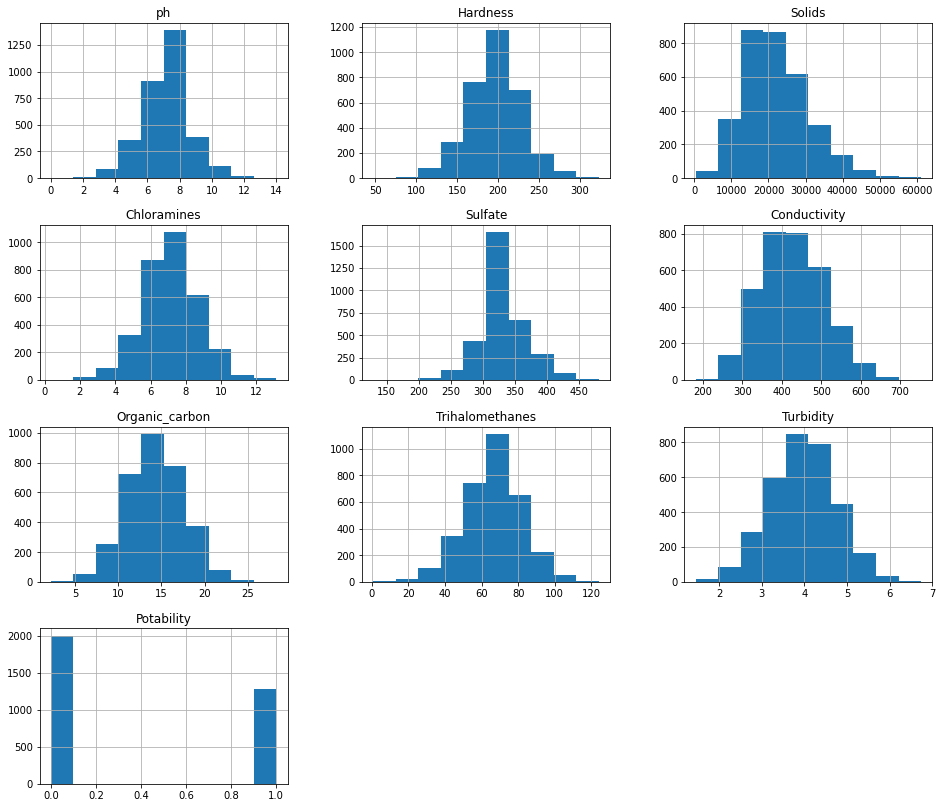

In [ ]:
#Plotando um gráfico de cada variável para obter uma visão geral e possíveis outliers (valores discrepantes)
data.hist(figsize=(16,14));

In [ ]:
#Criando variáveis dependentes 'Potability' e independentes
X = data.drop('Potability',axis=1)
y = data['Potability']

#Normalização dos valores entre 0 e 1
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X)

In [ ]:
X

ph  Hardness    Solids  ...  Organic_carbon  Trihalomethanes  Turbidity
0     0.502625  0.571139  0.336096  ...        0.313402         0.699753   0.286091
1     0.265434  0.297400  0.300611  ...        0.497319         0.450999   0.576793
2     0.578509  0.641311  0.321619  ...        0.562017         0.532866   0.303637
3     0.594055  0.605536  0.356244  ...        0.622089         0.808065   0.601015
4     0.649445  0.484851  0.289922  ...        0.358555         0.253606   0.496327
...        ...       ...       ...  ...             ...              ...        ...
3271  0.333436  0.530482  0.775947  ...        0.448062         0.535037   0.564534
3272  0.557775  0.530016  0.279263  ...        0.678284         0.534508   0.254915
3273  0.672822  0.465486  0.539101  ...        0.338662         0.560655   0.349570
3274  0.366197  0.664407  0.191490  ...        0.343638         0.622659   0.616120
3275  0.562477  0.535635  0.280484  ...        0.534114         0.632478   0.162441

[3276 rows x 9 columns]

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

### **Particionar os dados em Treino/Teste**

In [ ]:
#Particionando os dados em treino (75%) e teste (25%)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state=42)
print('Existem {} amostras de treino e {} amostras de teste'.
format(X_treino.shape[0], X_teste.shape[0]))

Existem 2457 amostras de treino e 819 amostras de teste


## Avaliação 3 - Avaliação do Projeto de Ensino (Paper): Avaliação dos métodos e predição

### **Modelo de Regressão Logística (LogisticRegression)**

Regressão logística é um método de aprendizado de máquina que fornece uma previsão sempre entre 0 e 1, de forma que podemos interpretar seus resultados como uma probabilidade válida.
A regressão logística não será influenciada por outliers que não fornecem informação nova, pois a atenção do algoritmo será sempre concentrada na região de fronteira.

In [ ]:
ML_LogisticRegression = LogisticRegression()
ML_LR = ML_LogisticRegression.fit(X_treino, y_treino)
y_LRpredito = ML_LR.predict(X_teste)
AccuracyCalc_LR = accuracy_score(y_LRpredito, y_teste, normalize=False)
AccuracyCalc_LR2 = round(accuracy_score(y_LRpredito, y_teste) * 100, 2)
print(AccuracyCalc_LR)
print(AccuracyCalc_LR2)
#print('O algoritmo de Regressão Logística teve uma precisão de {} na base de treino'
#.format(ML_LogisticRegression.score(X_treino,y_treino) * 100, 2))
print('O algoritmo de Regressão Logística teve uma precisão de {} na base de teste'
.format(ML_LogisticRegression.score(X_teste, y_teste) * 100))

510
62.27
O algoritmo de Regressão Logística teve uma precisão de 62.27106227106227 na base de teste


In [ ]:
#Matriz de Confusão
print(classification_report(y_teste, y_LRpredito))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       510
           1       0.00      0.00      0.00       309

    accuracy                           0.62       819
   macro avg       0.31      0.50      0.38       819
weighted avg       0.39      0.62      0.48       819



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Modelo Random Forest**

Random Forest é um método de aprendizado de máquina utilizado para problemas que envolvam classificação ou regressão.

Podemos pensar em uma árvore de decisão como uma representação gráfica para um determinado processo de decisão. As árvores são formadas por nós, que armazenam informação (perguntas). O nó raiz é o nó que possui maior nível hierárquico e, a partir dele, ramificam-se os nós filhos. O nó que não possui filhos é conhecido como nó folha ou terminal.

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_treino, y_treino)
y_RFpredito = rf.predict(X_teste)
AccuracyCalc_RF = accuracy_score(y_RFpredito, y_teste, normalize=False)
AccuracyCalc_RF2 = round(accuracy_score(y_RFpredito, y_teste) * 100, 2)
print(AccuracyCalc_RF)
print(AccuracyCalc_RF2)
print('O algoritmo Random Forest teve uma precisão de {} na base de teste'
.format(rf.score(X_teste, y_teste) * 100))

569
69.47
O algoritmo Random Forest teve uma precisão de 69.47496947496947 na base de teste


In [ ]:
#Matriz de Confusão
print(classification_report(y_teste, y_RFpredito))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       510
           1       0.67      0.37      0.48       309

    accuracy                           0.69       819
   macro avg       0.69      0.63      0.63       819
weighted avg       0.69      0.69      0.67       819



### **Modelo Naive Bayes (GaussianNB)**

O algoritmo funciona como classificador e baseia-se na probabilidade de cada evento ocorrer ou pertencer a uma categoria, de acordo com a ocorrência do mesmo.

É um algoritmo classificador simples e possui um bom desempenho, não necessitando de muitas observações para se ter uma boa precisão.

In [ ]:
gNB = GaussianNB()
gNB.fit(X_treino, y_treino)
y_NBpredito = gNB.predict(X_teste)
AccuracyCalc_NB = (accuracy_score(y_NBpredito, y_teste, normalize=False))
AccuracyCalc_NB2 = round(accuracy_score(y_NBpredito, y_teste) * 100, 2)
print(AccuracyCalc_NB)
print(AccuracyCalc_NB2)
print('O algoritmo GaussianNB teve uma precisão de {} na base de teste'
.format(gNB.score(X_teste, y_teste) * 100))

521
63.61
O algoritmo GaussianNB teve uma precisão de 63.61416361416361 na base de teste


In [ ]:
#Matriz de Confusão
print(classification_report(y_teste, y_NBpredito))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75       510
           1       0.55      0.21      0.31       309

    accuracy                           0.64       819
   macro avg       0.60      0.55      0.53       819
weighted avg       0.61      0.64      0.58       819



## Conclusão

Os modelos Random Forest, com acurácia de 69%,  e GaussianNB, com acurácia de 63%, se mostraram eficientes para prever a probabilidade de água potável e não potável de acordo com as informações entregues aos algoritmos de Machine Learning.

Escolhemos o modelo Random Forest pelo mesmo possuir uma acurácia maior na classe 1 (água potável) do que o concorrente GaussianNB.

O modelo de Regressão Logística foi reprovado por não prever nenhuma entrada com os valores de água potável (Classe = 1).

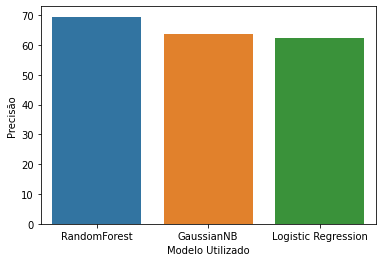

In [ ]:
#Criação do dataframe 'Resultados', contendo os valores da precisão dos modelos de ML utilizados
Resultados = pd.DataFrame({'Modelo Utilizado' : ['Logistic Regression', 'RandomForest', 'GaussianNB'],
                         'Precisão' : [AccuracyCalc_LR2, AccuracyCalc_RF2, AccuracyCalc_NB2]})

Resultados.sort_values(by='Precisão', ascending=False, inplace=True)

#Criação de gráfico de barras comparando os valores presentes no dataframe 'Resultados'
sns.barplot(y = 'Precisão',x = 'Modelo Utilizado', data = Resultados)

## Referências:

* LogisticRegression - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* GaussianNB - https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#sklearn.naive_bayes.GaussianNB
* RandonForest - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier
* Função "Accuracy_Score" - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
* Função "Classification_report" - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report
* Função "MinMaxScaler" - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler
* Função "Train_test_split" - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split
* Função "DataFrame.Apply" com uso da função "lambda" - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html - https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7 - https://stackoverflow.com/questions/37428218/how-to-properly-apply-a-lambda-function-into-a-pandas-data-frame-column
* Dataset Utilizado - https://www.kaggle.com/adityakadiwal/water-potability
* StackOverFlow - https://pt.stackoverflow.com/
* Livro didático "Machine Learning I - Classificação e Regressão"